# 1.Introduction
I will divide this notebook in parts, in the end of each part i wish improve the results. I will do it until 90+% or spend 2 weeks in this notebook.


Im studying neural networks and than i will use in my works.

## 2 . Simple code only with basics feature engeneering

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
trainOriginalData = pd.read_csv('/kaggle/input/titanic/train.csv')
testOriginalData = pd.read_csv('/kaggle/input/titanic/test.csv')
print(trainOriginalData.head(5))
print('\n')
print(testOriginalData.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  




In [4]:
print(trainOriginalData.isna().sum(),"\n")
print(trainOriginalData.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
trainData = trainOriginalData.drop(["Name","Sex","Ticket","Cabin","Embarked","Cabin"], axis = 1)
testData = testOriginalData.drop(["Name", "Sex", "Ticket", "Cabin","Embarked","Cabin"], axis = 1)

In [6]:
yTrain = trainData["Survived"]
xTrain = trainData.fillna(trainData.mode())
xTrain = xTrain.drop(["Survived"],axis = 1)
xTest = testData.fillna(trainData.mode())

In [7]:
print(xTrain.isna().sum(),"\n")
print(xTest.isna().sum())
xTrain['Fare'] = xTrain['Fare'].fillna(xTrain['Fare'].mean())
xTrain['Age'] = xTrain['Age'].fillna(xTrain['Age'].mean())
xTest['Age'] = xTest['Age'].fillna(xTest['Age'].mean())
xTest['Fare'] = xTest['Fare'].fillna(xTest['Fare'].mean())
print(xTest.isna().sum())

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64 

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [8]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=100, min_samples_leaf= 3)
#model.fit(xTrain, yTrain)

In [9]:
#predictions = model.predict(xTest)

#output = pd.DataFrame({'PassengerId': xTest.PassengerId, 'Survived': predictions})
#output.to_csv('submissionBasicRF.csv', index=False)
#print("Your submission was successfully saved!")

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
num_epochs = 30
num_hidden_units = 2048
learning_rate_init = 0.01
activation = 'relu'
SEED = 100

In [12]:
mlp = MLPClassifier(
    hidden_layer_sizes=(num_hidden_units,),
    activation=activation,
    learning_rate_init=learning_rate_init,
    warm_start=True,
    verbose=True,
    random_state=SEED,
    early_stopping=True,
    n_iter_no_change=100, # large number of iterations to avoid early stopping message
)

In [13]:
#mlp.fit(xTrain, yTrain)

In [14]:
#predictions = mlp.predict(xTest)
#output = pd.DataFrame({'PassengerId': xTest.PassengerId, 'Survived': predictions})
#output.to_csv('submissionDataCkeanCNN.csv', index=False)
#print("Your submission was successfully saved!")

This part achieve almost 70% in the competetion.

## 2.Adding feature treatment

In [15]:
trainOriginalData = pd.read_csv('/kaggle/input/titanic/train.csv')
testOriginalData = pd.read_csv('/kaggle/input/titanic/test.csv')

In [16]:
trainOriginalData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
trainOriginalData['Sex'] = pd.get_dummies(trainOriginalData['Sex'], dtype=int)["male"]
testOriginalData['Sex'] = pd.get_dummies(testOriginalData['Sex'], dtype=int)["male"]

In [18]:
trainOriginalData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [19]:
trainOriginalData["Age"] = trainOriginalData["Age"]/trainOriginalData["Age"].max()
trainOriginalData['Age'] = trainOriginalData['Age'].fillna(trainOriginalData['Age'].mean())

testOriginalData["Age"] = testOriginalData["Age"]/testOriginalData["Age"].max()
testOriginalData['Age'] = testOriginalData['Age'].fillna(testOriginalData['Age'].mean())

trainOriginalData["Fare"] = trainOriginalData["Fare"]/trainOriginalData["Fare"].max()
trainOriginalData['Fare'] = trainOriginalData['Fare'].fillna(trainOriginalData['Fare'].mean())

testOriginalData["Fare"] = testOriginalData["Fare"]/testOriginalData["Fare"].max()
testOriginalData['Fare'] = testOriginalData['Fare'].fillna(testOriginalData['Fare'].mean())

In [20]:
trainOriginalData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.275000,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.475000,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0.325000,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.437500,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0.437500,0,0,373450,0.015713,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0.337500,0,0,211536,0.025374,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,0.237500,0,0,112053,0.058556,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.371239,1,2,W./C. 6607,0.045771,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,0.325000,0,0,111369,0.058556,C148,C


In [21]:
trainOriginalData = trainOriginalData.drop(["Ticket","Cabin","Name","PassengerId"], axis = 1)
testOriginalData = testOriginalData.drop(["Ticket","Cabin","Name","PassengerId"], axis = 1)

In [22]:
trainOriginalData

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.275000,1,0,0.014151,S
1,1,1,0,0.475000,1,0,0.139136,C
2,1,3,0,0.325000,0,0,0.015469,S
3,1,1,0,0.437500,1,0,0.103644,S
4,0,3,1,0.437500,0,0,0.015713,S
...,...,...,...,...,...,...,...,...
886,0,2,1,0.337500,0,0,0.025374,S
887,1,1,0,0.237500,0,0,0.058556,S
888,0,3,0,0.371239,1,2,0.045771,S
889,1,1,1,0.325000,0,0,0.058556,C


In [23]:
pd.get_dummies(trainOriginalData['Embarked'], dtype=int)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [24]:
trainOriginalData = pd.concat([trainOriginalData, pd.get_dummies(trainOriginalData['Embarked'], dtype=int)], axis=1)
testOriginalData = pd.concat([testOriginalData, pd.get_dummies(testOriginalData['Embarked'], dtype=int)], axis=1)

In [25]:
trainOriginalData = trainOriginalData.drop(["Embarked"], axis = 1)
testOriginalData = testOriginalData.drop(["Embarked"], axis = 1)

In [26]:
trainData = trainOriginalData
testData = testOriginalData

In [27]:
testData

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,0.453947,0,0,0.015282,0,1,0
1,3,0,0.618421,1,0,0.013663,0,0,1
2,2,1,0.815789,0,0,0.018909,0,1,0
3,3,1,0.355263,0,0,0.016908,0,0,1
4,3,0,0.289474,1,1,0.023984,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,0.398324,0,0,0.015713,0,0,1
414,1,0,0.513158,0,0,0.212559,1,0,0
415,3,1,0.506579,0,0,0.014151,0,0,1
416,3,1,0.398324,0,0,0.015713,0,0,1


In [28]:
mlp = MLPClassifier(
    hidden_layer_sizes=(num_hidden_units,),
    activation=activation,
    learning_rate_init=learning_rate_init,
    warm_start=False,
    max_iter= 9999,
    batch_size=50,
    verbose=False,
    validation_fraction = 0.2,
    learning_rate = "adaptive",
    random_state=SEED,
    early_stopping=True,
    n_iter_no_change=100, # large number of iterations to avoid early stopping message
)

In [29]:
#mlp.fit(xTrain, yTrain)
scores = cross_val_score(mlp, xTrain, yTrain, cv=5)
print("Mean Accuracy was: ",sum(scores)/len(scores))

Mean Accuracy was:  0.7071181972255351


In [30]:
mlp.fit(xTrain, yTrain)

MLPClassifier(batch_size=50, early_stopping=True, hidden_layer_sizes=(2048,),
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=9999,
              n_iter_no_change=100, random_state=100, validation_fraction=0.2)

In [31]:
predictions = mlp.predict(xTest)
output = pd.DataFrame({'PassengerId': xTest.PassengerId, 'Survived': predictions})
output.to_csv('submissionDataCleanedCNN.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


The result was worst than last one, now i will make a better feature engeneering

## 3.Treating data outliers and improving feature engeneering


https://numpy.org/doc/2.1/reference/generated/numpy.percentile.html

In [32]:
def multiOutliersDataset(df: pd.DataFrame, qtOut: int, features: list) -> list:
    indices = []
    # Iterar pelas colunas especificadas
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        
        IQR = Q3 - Q1
        
        outlierLimits = 1.5 * IQR

        outliersColumn = df[(df[col] < Q1 - outlierLimits) | (df[col] > Q3 + outlierLimits)].index
        indices.extend(outliersColumn)

    # Contar ocorrências de outliers por observação
    outlier_counts = Counter(indices)

    # Selecionar observações com mais de 'n' outliers
    multiple_outliers = [index for index, count in outlier_counts.items() if count > qtOut]

    return multiple_outliers

In [33]:
trainOriginalData = pd.read_csv('/kaggle/input/titanic/train.csv')
testOriginalData = pd.read_csv('/kaggle/input/titanic/test.csv')
print("Data type of dataframe columns: \n",trainOriginalData.dtypes)
print("\nStatistical metrics on data: \n", trainOriginalData.describe())

Data type of dataframe columns: 
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Statistical metrics on data: 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            P

In [34]:
print("Train Original Data\n",trainOriginalData.fillna(np.nan).isnull().sum())
print("\nTest Original Data\n",testOriginalData.fillna(np.nan).isnull().sum())

Train Original Data
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test Original Data
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [35]:
trainOriginalData['Sex'] = pd.get_dummies(trainOriginalData['Sex'], dtype=int)["male"]
testOriginalData['Sex'] = pd.get_dummies(testOriginalData['Sex'], dtype=int)["male"]

In [36]:
trainOriginalData = trainOriginalData.drop((multiOutliersDataset(trainOriginalData,2,["Pclass","Sex","Age","SibSp","Parch","Fare"])), axis = 0).reset_index(drop=True)

### 3.1. Feature Analisis

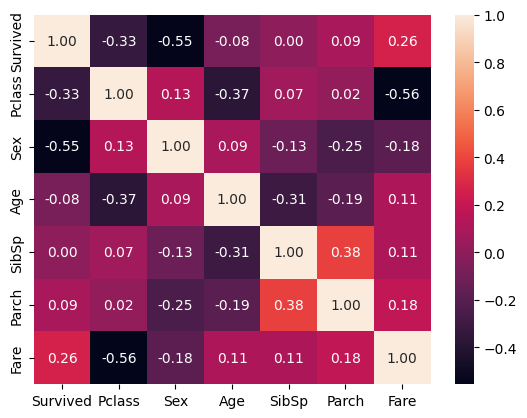

In [37]:
g = sns.heatmap(trainOriginalData[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare"]].corr(),annot=True, fmt = ".2f")